<a href="https://colab.research.google.com/github/Elizaveta0803/LabAnalitika/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_26_02_21ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. ЛИНЕЙНАЯ АЛГЕБРА scipy.linalg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg


In [2]:
arr = np.array([[1,2],[3, 4]])
linalg.det(arr)

-2.0

In [3]:
arr = np.array([[3, 2],[6, 4]])
linalg.det(arr)

0.0

In [4]:
arr = np.array([[1,2],[3, 4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

# SPICY.INTERPOLATE

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)
print(x, y)

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ] [-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


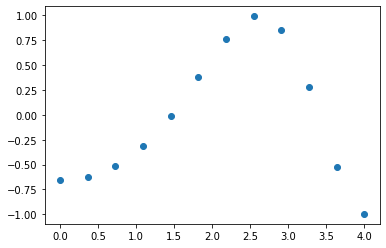

In [6]:
plt.plot(x, y, "o")

In [7]:
from scipy.interpolate import interp1d
f1 = interp1d(x, y, kind = 'linear')
f2 = interp1d(x, y, kind = 'cubic')

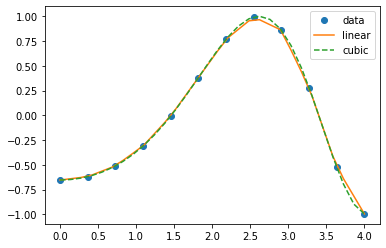

In [8]:
xnew = np.linspace(0, 4, 30)
plt.plot(x, y, "o", xnew, f1(xnew), "-", xnew, f2(xnew),"--")
plt.legend(["data", "linear", "cubic", "nearest"], loc = "best")
plt.show()

# Сплайны

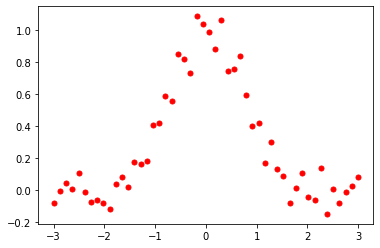

In [9]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms = 5)
plt.show()

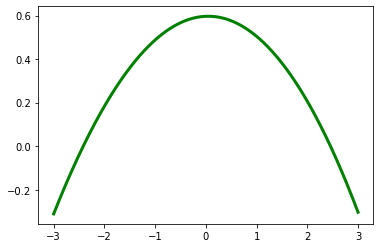

In [10]:
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw = 3)
plt.show()

# ОПТИМИЗАЦИЯ И ПОДГОНКА

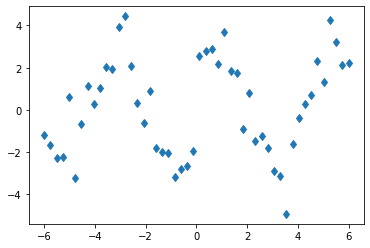

In [11]:
from scipy import optimize
x_data = np.linspace(-6, 6, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)
plt.plot(x_data, y_data, 'd', lw=3)

In [12]:
def test_func(x, a, b):
  return a * np.sin(b * x)

In [14]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

[2.82549298 1.48083762]


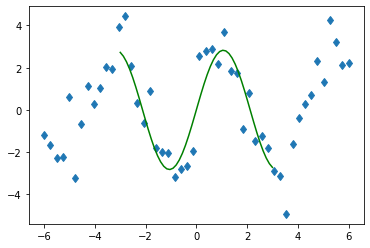

In [15]:
a=params[0]
b=params[1]
y1=test_func(x,a,b)
plt.plot(x_data, y_data, 'd', x, y1, 'g')
plt.show()

# Задание 1

Text(0, 0.5, 'min и max температура')

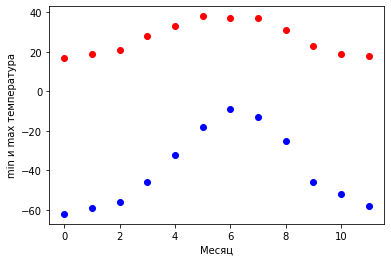

In [16]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Месяц')
plt.ylabel('min и max температура')

In [17]:
from scipy import optimize
def  yearly_temps(times, avg, ampl, time_offset):
  return (avg+ampl * np.cos((times + time_offset)* 2 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

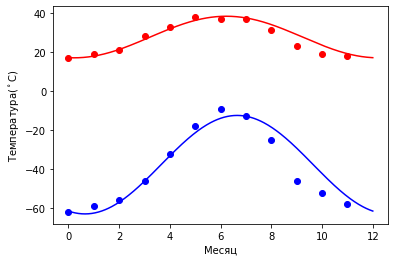

In [18]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Месяц')
plt.ylabel('Температура($^\circ$C)')
plt.show()